<a href="https://colab.research.google.com/github/Acarino19/DATA-201/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib


# Is there a difference in crime activity between two different quarter seasons for the year 2020? Also, which parks had the highest number of crimes for each quarter?

In [653]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Acarino19/DATA-201/main/nyc-park-crime-stats-q1-2020a.csv')
df1.head(5)

,1st QTRPARK CRIME REPORT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,SEVEN MAJOR COMPLAINTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Report covering the period Between Jan 1, 202...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.75,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0
4,VAN CORTLANDT PARK,BRONX,1146.43,ONE ACRE OR LARGER,0,0,0,0,0,0,0,0


In [340]:
df2= df1.dropna()

In [341]:
#Keep certain columns
df3= df2[['1st QTRPARK CRIME REPORT', 'Unnamed: 1', 'Unnamed: 11']]

In [342]:
df3.head()

,1st QTRPARK CRIME REPORT,Unnamed: 1,Unnamed: 11
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,0
4,VAN CORTLANDT PARK,BRONX,0
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
6,FRESHKILLS PARK,STATEN ISLAND,0


In [343]:
#rename columns
df4= df3.rename(columns={"1st QTRPARK CRIME REPORT": "PARK", "Unnamed: 1": "BOROUGH", "Unnamed: 11": "TOTAL PARK CRIMES"})

In [344]:
df4.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,0
4,VAN CORTLANDT PARK,BRONX,0
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
6,FRESHKILLS PARK,STATEN ISLAND,0


In [345]:
#reset index for consistency
dfn = df4.reset_index(drop=True)
dfn.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PARK,BOROUGH,TOTAL
1,PELHAM BAY PARK,BRONX,0
2,VAN CORTLANDT PARK,BRONX,0
3,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
4,FRESHKILLS PARK,STATEN ISLAND,0


In [658]:
#drop extra unneeded row from dataset
dfn0 = pd.DataFrame(dfn, columns= ['PARK'])
dfn0 = dfn.drop([0])
dfn0.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
1,PELHAM BAY PARK,BRONX,0
2,VAN CORTLANDT PARK,BRONX,0
3,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
4,FRESHKILLS PARK,STATEN ISLAND,0
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8


In [659]:
dfn0.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
1,PELHAM BAY PARK,BRONX,0
2,VAN CORTLANDT PARK,BRONX,0
3,ROCKAWAY BEACH AND BOARDWALK,QUEENS,0
4,FRESHKILLS PARK,STATEN ISLAND,0
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8
6,LATOURETTE PARK & GOLF COURSE,STATEN ISLAND,0
7,MARINE PARK,BROOKLYN,1
8,BELT PARKWAY/SHORE PARKWAY,BROOKLYN/QUEENS,0
9,BRONX PARK,BRONX,3
10,FRANKLIN D. ROOSEVELT BOARDWALK AND BEACH,STATEN ISLAND,0


In [660]:
dfn0.describe()

,PARK,BOROUGH,TOTAL PARK CRIMES
count,1154,1154,1154
unique,1154,6,6
top,RIVERDALE PARK,BROOKLYN,0
freq,1,327,1067


In [480]:
#group by borough to see total values so far
dfn0.groupby(['BOROUGH'])['TOTAL PARK CRIMES'].count().sort_values(ascending=False)

BOROUGH
BROOKLYN           327
QUEENS             284
BRONX              217
MANHATTAN          197
STATEN ISLAND      124
BROOKLYN/QUEENS      5
Name: TOTAL PARK CRIMES, dtype: int64

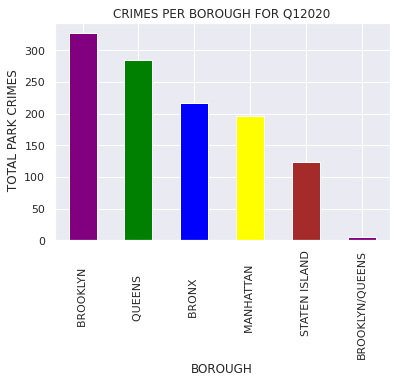

In [350]:
#Create bar graph to visualize current data
dfn0['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= ' TOTAL PARK CRIMES', color=['Purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

The above graph is not accurate as it takes into account every park even with a 0 value of park crime. 

In [351]:
# I had to remove all 0 values


In [499]:
#dfn0.drop(dfn0.index[dfn0['TOTAL PARK CRIMES'] == 0], inplace=True)


For some reason the above code wasnt working as there were string and integer values in the Total park crimes columns, so I converted the values to all integers,

In [501]:
dfn0['TOTAL PARK CRIMES'] = pd.to_numeric(dfn0['TOTAL PARK CRIMES'], errors = 'coerce')

In [502]:
#Drop rows where there were 0 crimes comitted for that specific park
dfn0.drop(dfn0.index[dfn0['TOTAL PARK CRIMES'] <1 ], inplace=True)
dfn0.head()

,PARK,BOROUGH,TOTAL PARK CRIMES
5,FLUSHING MEADOWS CORONA PARK,QUEENS,8
34,SOUNDVIEW PARK,BRONX,4
181,RUFUS KING PARK,QUEENS,4
199,WASHINGTON SQUARE PARK,MANHATTAN,3
114,ST. MARY'S PARK BRONX,BRONX,3


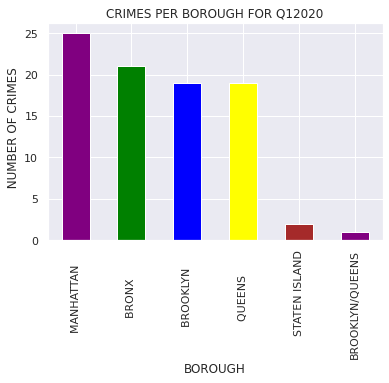

In [503]:
#Created bar graph with a more accurate number of crimes. Only counts of crimes comitted.
dfn0['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['Purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

**The above graph now shows all non zero values and number of crimes but NOT total number of crimes for each park.**

In [444]:
dfn0.groupby(['BOROUGH'])['TOTAL PARK CRIMES'].count().sort_values(ascending=False)

BOROUGH
MANHATTAN          25
BRONX              21
QUEENS             19
BROOKLYN           19
STATEN ISLAND       2
BROOKLYN/QUEENS     1
Name: TOTAL PARK CRIMES, dtype: int64

In [662]:
dfn1= dfn0.reset_index(drop=True)
dfn1.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,FLUSHING MEADOWS CORONA PARK,QUEENS,8
1,SOUNDVIEW PARK,BRONX,4
2,RUFUS KING PARK,QUEENS,4


**TOP 10 PARKS THAT HAD THE MOST CRIME FOR Q1 2020**

In [673]:
dfn2= dfn1.sort_values(["TOTAL PARK CRIMES"], ascending=False)
dfn2.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,FLUSHING MEADOWS CORONA PARK,QUEENS,8
2,RUFUS KING PARK,QUEENS,4
1,SOUNDVIEW PARK,BRONX,4
3,WASHINGTON SQUARE PARK,MANHATTAN,3
4,ST. MARY'S PARK BRONX,BRONX,3
5,FORT GREENE PARK,BROOKLYN,3
6,BRONX PARK,BRONX,3
7,ST. NICHOLAS PARK,MANHATTAN,3
8,UNION SQUARE PARK,MANHATTAN,3
16,EAST RIVER PARK,MANHATTAN,2



# DATA FOR Q3 2020



In [526]:
dfx = pd.read_csv('/content/drive/MyDrive/nyc-park-crime-stats-q3-2020.csv')
dfx.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PARK,BOROUGH,SIZE (ACRES),CATEGORY,MURDER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,TOTAL
3,PELHAM BAY PARK,BRONX,2771.747,ONE ACRE OR LARGER,0,0,1,2,0,3,0,6
4,VAN CORTLANDT PARK,BRONX,1146.430,ONE ACRE OR LARGER,0,0,1,2,0,2,0,5


In [485]:
dfx2= dfx.dropna()

In [487]:
dfx3= dfx2[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 11']]

In [488]:
dfx4= dfx3.rename(columns={"Unnamed: 0": "PARK", "Unnamed: 1": "BOROUGH", "Unnamed: 11": "TOTAL PARK CRIMES"})

In [592]:
dfx4.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
2,PARK,BOROUGH,TOTAL
3,PELHAM BAY PARK,BRONX,6
4,VAN CORTLANDT PARK,BRONX,5


In [528]:
dfx5 = pd.DataFrame(dfx4, columns= ['PARK'])
dfx5 = dfx4.drop([2])
dfx5.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
3,PELHAM BAY PARK,BRONX,6
4,VAN CORTLANDT PARK,BRONX,5
5,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


In [529]:
dfx6 = dfx5.reset_index(drop=True)
dfx6.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PELHAM BAY PARK,BRONX,6
1,VAN CORTLANDT PARK,BRONX,5
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


In [531]:
dfx6['TOTAL PARK CRIMES'] = pd.to_numeric(dfx6['TOTAL PARK CRIMES'], errors = 'coerce')

In [532]:
dfx6.drop(dfx6.index[dfx6['TOTAL PARK CRIMES'] <1 ], inplace=True)
dfx6.head(3)

,PARK,BOROUGH,TOTAL PARK CRIMES
0,PELHAM BAY PARK,BRONX,6
1,VAN CORTLANDT PARK,BRONX,5
2,ROCKAWAY BEACH AND BOARDWALK,QUEENS,6


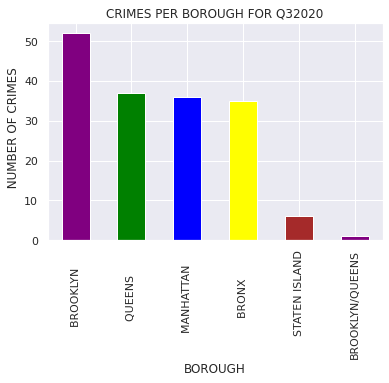

In [533]:
#barchart shows higher number of crimes for Q3 compared to Q1
dfx6['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q32020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['Purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

**Top 10 parks that had the highes number of crimes for Q3 2020.**

In [674]:
dfx6= dfx6.sort_values(["TOTAL PARK CRIMES"], ascending=False)
dfx6.head(10)

,PARK,BOROUGH,TOTAL PARK CRIMES
198,WASHINGTON SQUARE PARK,MANHATTAN,20
4,FLUSHING MEADOWS CORONA PARK,QUEENS,17
15,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15
25,RIVERSIDE PARK,MANHATTAN,12
11,PROSPECT PARK,BROOKLYN,11
113,ST. MARY'S PARK BRONX,BRONX,11
8,BRONX PARK,BRONX,10
189,TOMPKINS SQUARE PARK,MANHATTAN,8
98,EAST RIVER PARK,MANHATTAN,7
253,UNION SQUARE PARK,MANHATTAN,7


**Final Comparison between Q1 and Q2 Quarters for the year 2020**

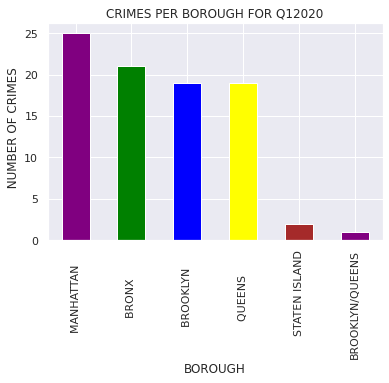

In [520]:
dfn0['BOROUGH'].value_counts().plot(kind='bar', title="CRIMES PER BOROUGH FOR Q12020", xlabel= 'BOROUGH', ylabel= '  NUMBER OF CRIMES', color=['purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

In [563]:
dfn3= dfn0.groupby(['BOROUGH'])['TOTAL PARK CRIMES'].count().sort_values(ascending=False)

In [768]:
#dfn3.plot.bar(x = 'BOROUGH', y = 'TOTAL PARK CRIMES', color=['red', 'green', 'blue', 'brown'])

# Extra bar plot

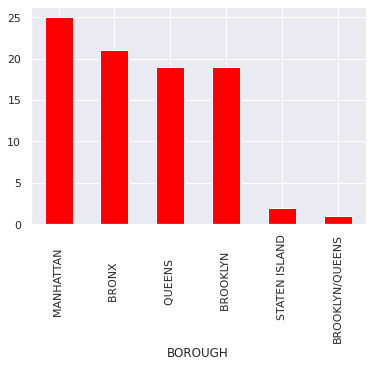

In [569]:
dfn3.plot(kind='bar', color = 'red')

In [575]:
import matplotlib.pyplot as plt

# Mergin datasets

In [731]:
#Merged data frames to see what i can work with
dfr = pd.merge(dfx6, dfn2, on = 'PARK')
dfr.head(10)

,PARK,BOROUGH_x,TOTAL PARK CRIMES_x,BOROUGH_y,TOTAL PARK CRIMES_y
0,WASHINGTON SQUARE PARK,MANHATTAN,20,MANHATTAN,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,QUEENS,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,BROOKLYN,1
3,RIVERSIDE PARK,MANHATTAN,12,MANHATTAN,2
4,PROSPECT PARK,BROOKLYN,11,BROOKLYN,0
5,ST. MARY'S PARK BRONX,BRONX,11,BRONX,3
6,BRONX PARK,BRONX,10,BRONX,3
7,TOMPKINS SQUARE PARK,MANHATTAN,8,MANHATTAN,1
8,EAST RIVER PARK,MANHATTAN,7,MANHATTAN,2
9,UNION SQUARE PARK,MANHATTAN,7,MANHATTAN,3


In [765]:
#rename columns

dfr2= dfr.rename(columns={"BOROUGH_x": "BOROUGH", "TOTAL PARK CRIMES_x": "PARK CRIMES Q3", "BOROUGH_y": "BOROUGH Q1", 'TOTAL PARK CRIMES_y': "PARK CRIMES Q1"})
dfr2.head()

,PARK,BOROUGH,PARK CRIMES Q3,BOROUGH Q1,PARK CRIMES Q1
0,WASHINGTON SQUARE PARK,MANHATTAN,20,MANHATTAN,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,QUEENS,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,BROOKLYN,1
3,RIVERSIDE PARK,MANHATTAN,12,MANHATTAN,2
4,PROSPECT PARK,BROOKLYN,11,BROOKLYN,0


In [766]:
dfr2.drop('BOROUGH Q1', axis = 1, inplace = True)


In [762]:
dfr2['PARK CRIMES Q1'] = pd.to_numeric(dfr2['PARK CRIMES Q1'], errors = 'coerce')

In [767]:
#Final merged data set with Park crime numbers for both Quarters
dfr2.head(9)

,PARK,BOROUGH,PARK CRIMES Q3,PARK CRIMES Q1
0,WASHINGTON SQUARE PARK,MANHATTAN,20,3
1,FLUSHING MEADOWS CORONA PARK,QUEENS,17,8
2,CONEY ISLAND BEACH & BOARDWALK,BROOKLYN,15,1
3,RIVERSIDE PARK,MANHATTAN,12,2
4,PROSPECT PARK,BROOKLYN,11,0
5,ST. MARY'S PARK BRONX,BRONX,11,3
6,BRONX PARK,BRONX,10,3
7,TOMPKINS SQUARE PARK,MANHATTAN,8,1
8,EAST RIVER PARK,MANHATTAN,7,2


In [755]:
#dfr2.drop('PARK', axis = 1, inplace = True)
dfr2.head()

,BOROUGH,PARK CRIMES Q3,PARK CRIMES Q1
0,MANHATTAN,20,3
1,QUEENS,17,8
2,BROOKLYN,15,1
3,MANHATTAN,12,2
4,BROOKLYN,11,0


In [763]:
dfr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PARK            167 non-null    object
 1   BOROUGH         167 non-null    object
 2   PARK CRIMES Q3  167 non-null    int64 
 3   PARK CRIMES Q1  167 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.5+ KB
